In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
import matplotlib.pyplot as plt
import urllib.request
import io
from PIL import Image
import numpy as np

In [20]:
data = pd.read_csv('movies.csv')


In [21]:
data.dropna(inplace=True)


In [22]:
data['title_and_genre'] = data['title'] + ' ' + data['genres']


In [23]:
data['title_and_genre'] = data['title_and_genre'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))


In [24]:
tfidf = TfidfVectorizer()


In [25]:
tfidf_matrix = tfidf.fit_transform(data['title_and_genre'])


In [26]:
cosine_sim = cosine_similarity(tfidf_matrix)


In [30]:
def get_recommendations(title, cosine_sim=cosine_sim, data=data):
    # Find the index of the movie that matches the title
    idx = data[data['title'] == title].index[0]

    # Get the pairwise similarity scores for all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Return the titles of the top 10 movies
    movie_indices = [i[0] for i in sim_scores]
    recommended_movies = data.iloc[movie_indices]
    return recommended_movies['title']

In [31]:
recommendations = get_recommendations('Toy Story (1995)')


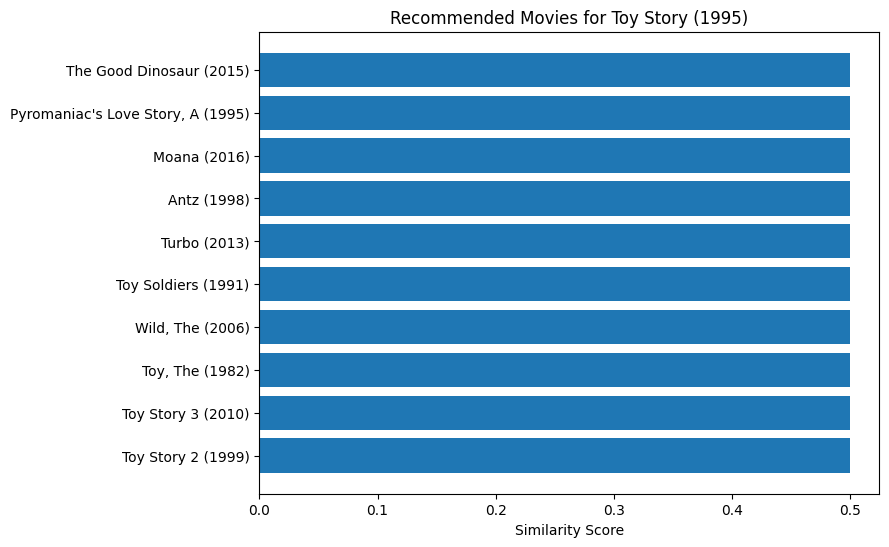

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(recommendations, width=0.5)
ax.set_title('Recommended Movies for Toy Story (1995)')
ax.set_xlabel('Similarity Score')
plt.show()